In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 

1. Basic Plots

Line Plot (Trend over time)

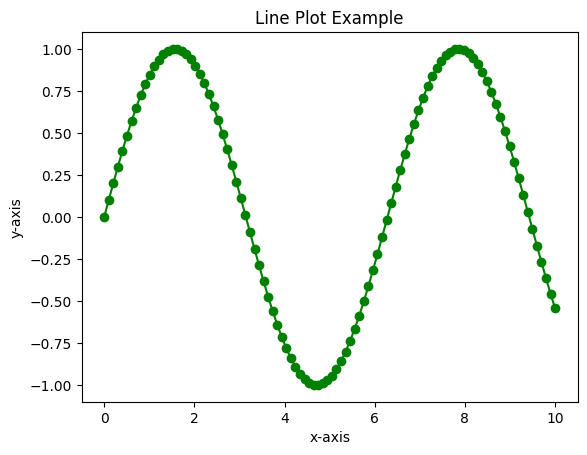

In [12]:
x = np.linspace(0, 10, 100)
y = np.sin(x)

plt.plot(x, y , marker='o', linestyle='-', color='green')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Line Plot Example')
plt.show()

 Bar Plot (Comparison of categorical data)

In [13]:
import seaborn as sns
import pandas as pd

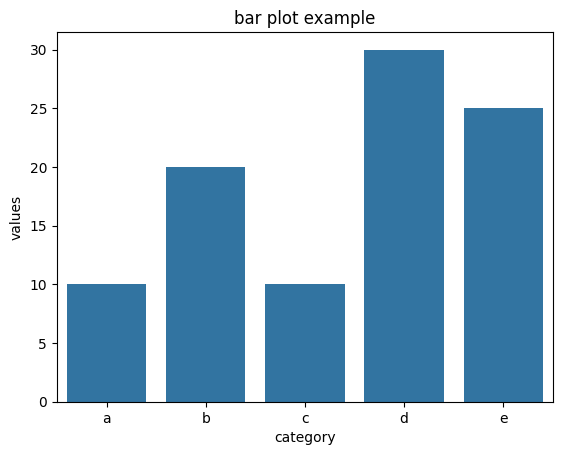

In [14]:
data = pd.DataFrame({'category':['a', 'b', 'c', 'd', 'e'], 'values':[10, 20, 10, 30, 25]})

sns.barplot(x='category', y='values', data= data)
plt.title('bar plot example')
plt.show()


Histogram (Distribution of numerical data)

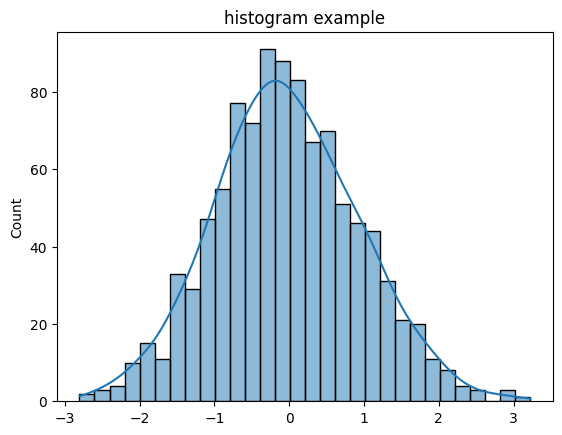

In [16]:
data = np.random.randn(1000)

sns.histplot(data, bins= 30, kde= True)
plt.title('histogram example')
plt.show()

Box Plot (Detecting outliers and data spread)

In [18]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [32]:
tips = sns.load_dataset('tips')
tips.head(4)
tips.shape

(244, 7)

<Axes: xlabel='total_bill', ylabel='Count'>

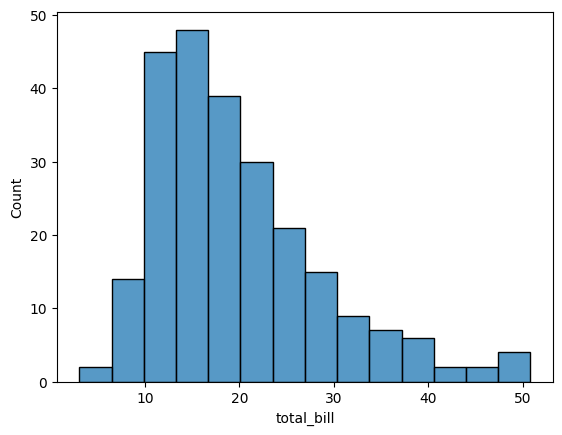

In [34]:
sns.histplot(x='total_bill', data=tips)

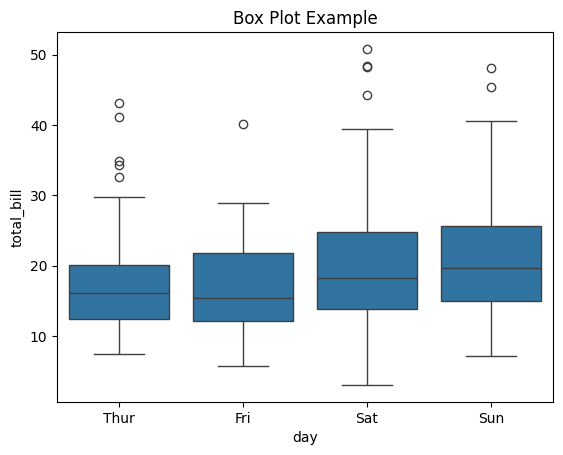

In [25]:
sns.boxplot(x='day', y='total_bill', data=tips)

plt.title("Box Plot Example")
plt.show()

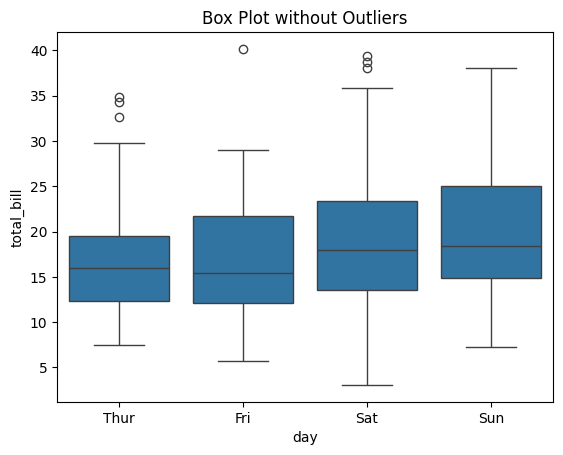

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
tips = sns.load_dataset('tips')

# Compute IQR
Q1 = tips['total_bill'].quantile(0.25)
Q3 = tips['total_bill'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
tips_cleaned = tips[(tips['total_bill'] >= lower_bound) & (tips['total_bill'] <= upper_bound)]

# Plot boxplot without outliers
sns.boxplot(x='day', y='total_bill', data=tips_cleaned)
plt.title("Box Plot without Outliers")
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_11968\1386790575.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_cleaned = tips.groupby("day", group_keys=False).apply(remove_outliers_iqr)
C:\Users\DELL\AppData\Local\Temp\ipykernel_11968\1386790575.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips_cleaned = tips.groupby("day", group_keys=False).apply(remove_outliers_iqr)


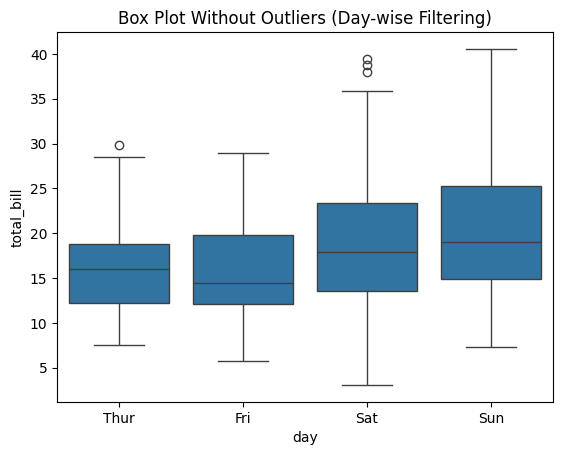

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
tips = sns.load_dataset('tips')

# Function to remove outliers for each group separately
def remove_outliers_iqr(group):
    Q1 = group['total_bill'].quantile(0.25)
    Q3 = group['total_bill'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Adjust multiplier if needed
    upper_bound = Q3 + 1.5 * IQR
    return group[(group['total_bill'] >= lower_bound) & (group['total_bill'] <= upper_bound)]

# Apply function group-wise
tips_cleaned = tips.groupby("day", group_keys=False).apply(remove_outliers_iqr)

# Plot boxplot without outliers
sns.boxplot(x='day', y='total_bill', data=tips_cleaned)
plt.title("Box Plot Without Outliers (Day-wise Filtering)")
plt.show()


In [30]:
tips_cleaned.shape

(232, 7)

C:\Users\DELL\AppData\Local\Temp\ipykernel_11968\2602753864.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_cleaned = tips.groupby("day", group_keys=False).apply(lambda g: remove_outliers_iqr(g, multiplier= 1.7))
C:\Users\DELL\AppData\Local\Temp\ipykernel_11968\2602753864.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  tips_cleaned = tips.groupby("day", group_keys=False).apply(lambda g: remove_outliers_iqr(g, multiplier= 1.7))


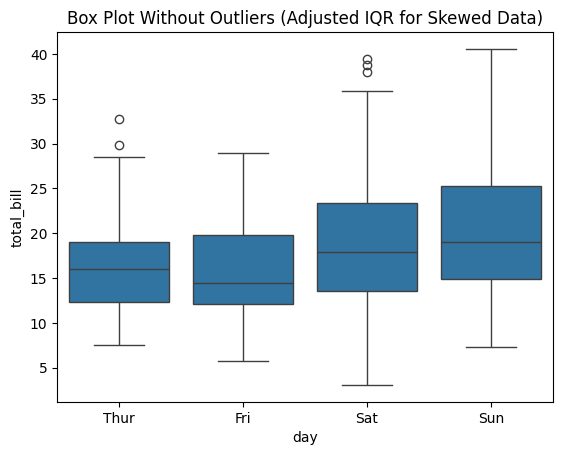

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
tips = sns.load_dataset('tips')

# Function to remove outliers using a stricter IQR multiplier
def remove_outliers_iqr(group, multiplier=1.7):  # Increased multiplier for skewed data
    Q1 = group['total_bill'].quantile(0.25)
    Q3 = group['total_bill'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return group[(group['total_bill'] >= lower_bound) & (group['total_bill'] <= upper_bound)]

# Apply function group-wise
tips_cleaned = tips.groupby("day", group_keys=False).apply(lambda g: remove_outliers_iqr(g, multiplier= 1.7))

# Plot boxplot without outliers
sns.boxplot(x='day', y='total_bill', data=tips_cleaned)
plt.title("Box Plot Without Outliers (Adjusted IQR for Skewed Data)")
plt.show()


Scatter Plot (Relationship between two variables)

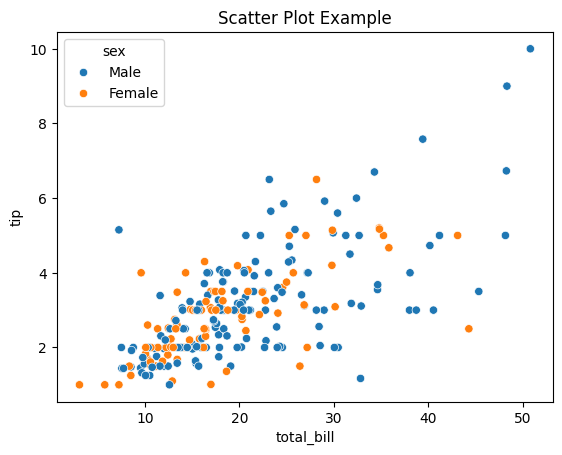

In [43]:
tips = sns.load_dataset('tips')
sns.scatterplot(x='total_bill', y='tip', hue='sex', data=tips)
plt.title("Scatter Plot Example")
plt.show()


 Pair Plot (Multiple relationships at once)

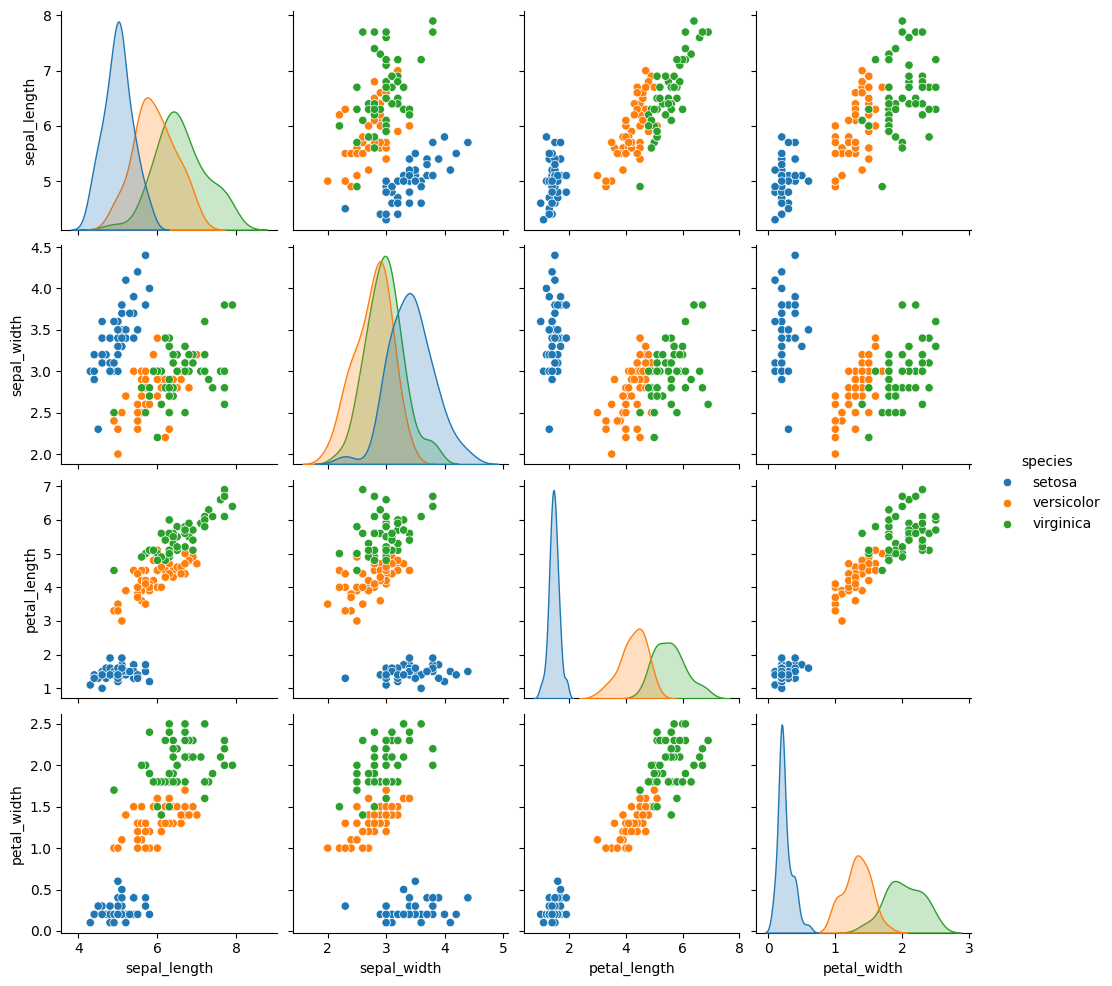

In [45]:
iris = sns.load_dataset('iris')


sns.pairplot(iris, hue='species')
plt.show()


Heatmap (Correlation between features)

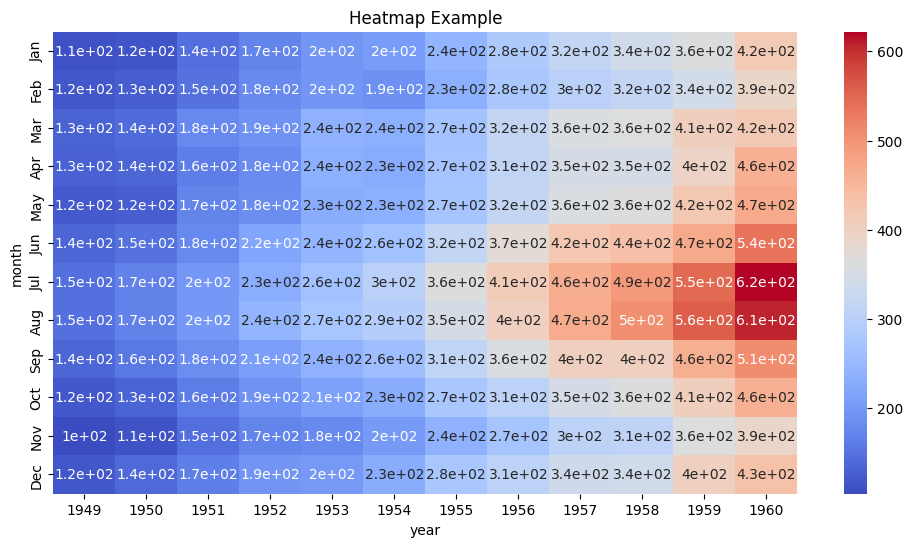

In [50]:
# Load dataset
df = sns.load_dataset('flights')

# Correct pivot syntax
df_pivot = df.pivot(index='month', columns='year', values='passengers')

plt.figure(figsize=(12, 6))
# Create heatmap
sns.heatmap(df_pivot, cmap='coolwarm', annot=True)

# Title
plt.title("Heatmap Example", fontsize=12)

# Show plot
plt.show()



heatmap on iris data set

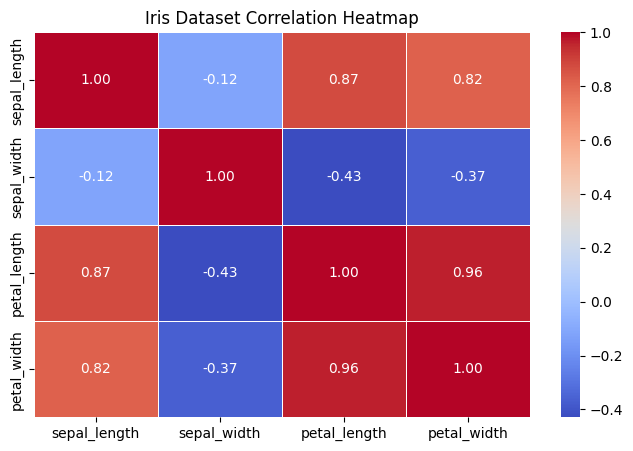

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
df = sns.load_dataset("iris")

# Select only numeric columns (exclude 'species')
df_numeric = df.select_dtypes(include=["number"])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Iris Dataset Correlation Heatmap")
plt.show()


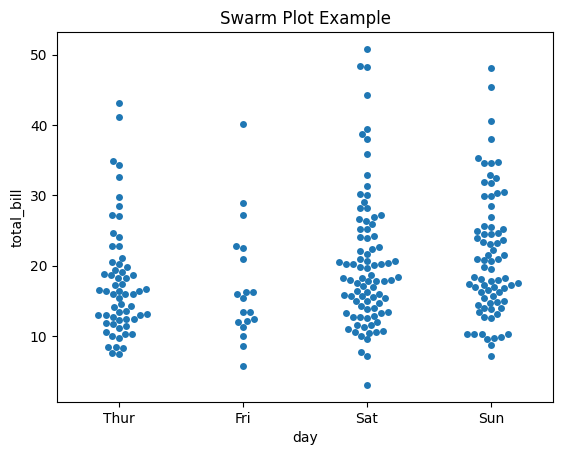

In [ ]:
# swarmplot 
sns.swarmplot(x='day', y='total_bill', data=tips)
plt.title("Swarm Plot Example")
plt.show()
